# Project 4: Functional Programming: Probability, Stats and Analytics


## Statistical Functions

In [1]:
import random

In [2]:
def total(lst):
    total_ = 0
    for val in lst:
        total_ +=val
    return total_

In [3]:
X1 = [random.randint(0,20) for i in range(0,10)]
print('X1:', X1)

X1: [4, 13, 6, 18, 0, 7, 18, 14, 8, 16]


In [4]:
X2 = [random.randint(0,100) for i in range(10)]
print('X2:', X2)

X2: [6, 72, 16, 68, 64, 41, 50, 19, 43, 2]


In [5]:
total1 = total(X1)
total2 = total(X2)
print('total of X1:', total1)
print('total of X2:', total2)

total of X1: 104
total of X2: 381


In [6]:
def mean(lst):
    n = len(lst)
    mean_ = total(lst) / n
    return mean_

In [7]:
print(mean(X1), mean(X2))

10.4 38.1


In [8]:
def median(lst):
    n = len(lst)
    lst = sorted(lst)
    if n % 2 != 0:
        #list length is odd
        middle_index = int((n - 1) / 2)
        median_ = lst[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        # pass slice with two middle values to mean()
        median_ = mean(lst[lower_middle_index : upper_middle_index + 1])
        
    return median_
median1 = median(X1)
median2 = median(X2)
print("median of X1:", median1)
print("median of X2:", median2)

median of X1: 10.5
median of X2: 42.0


In [9]:
median(X1 + [10])

10

In [10]:
def mode(lst):
    # use to record value(s) that appear most times
    max_count = 0
    # use to count occurrences of each value in list
    counter_dict = {}
    for value in lst:
        # count for each value should start at 0
        counter_dict[value] = 0
    for value in lst:
        # add on to the count of the value for each occurrence in lst
        counter_dict[value] += 1
    # make a list of the value (not keys) from the dictionary
    count_list = list(counter_dict.values())
    # and find the max value
    max_count = max(count_list)
    # use a generator to make a list of the values (keys) whose number of 
    # occurences in the list match max_count
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    
    return mode_

# . . .
mode1 = mode(X1)
mode2 = mode(X2)
print("mode of list1:", mode1)
print("mode of list2:", mode2)

mode of list1: [18]
mode of list2: [6, 72, 16, 68, 64, 41, 50, 19, 43, 2]


In [11]:
from collections import Counter

def mode2(lst):
    # Use Counter to count occurrences of each value in the list
    counts = Counter(lst)
    print("counts: ", counts)
    # Find the maximum count (mode)
    max_count = max(counts.values())
    # Use a list comprehension to get the mode(s)
    mode_ = [key for key, value in counts.items() if value == max_count]
    
    return mode_

In [12]:
# Example usage
modeX1 = mode2(X1)
modeX2 = mode2(X2)
print("mode of list1:", modeX1)
print("mode of list2:", modeX2)

counts:  Counter({18: 2, 4: 1, 13: 1, 6: 1, 0: 1, 7: 1, 14: 1, 8: 1, 16: 1})
counts:  Counter({6: 1, 72: 1, 16: 1, 68: 1, 64: 1, 41: 1, 50: 1, 19: 1, 43: 1, 2: 1})
mode of list1: [18]
mode of list2: [6, 72, 16, 68, 64, 41, 50, 19, 43, 2]


Text(0, 38.1, 'Mean(X2)')

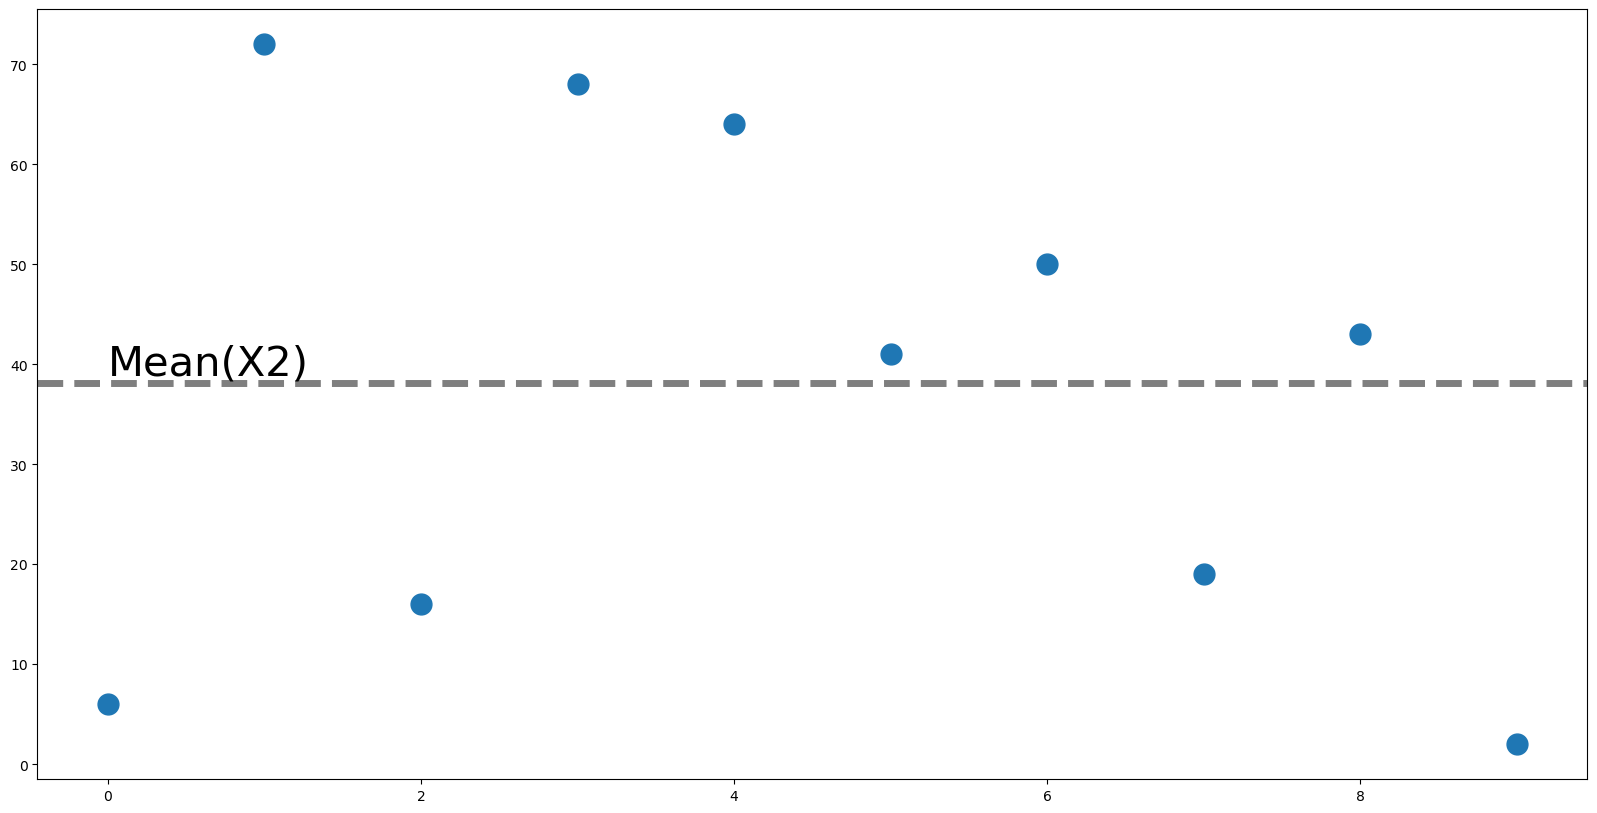

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (20,10))
ax.plot(X2, ls = '', marker = '.', markersize=30)
ax.axhline(mean(X2), linewidth = 5, alpha = .5, ls= "--", color="k")
ax.text(0, mean(X2), "Mean(X2)", va="bottom", fontsize=30)

## Statistics Describing Distributions

In [15]:
def variance(lst, sample = True):
    # popvar(list) = sum((xi - list_mean)**2) / n for all xi in list
    # save mean value of list
    list_mean = mean(lst)
    # use n to calculate average of sum squared diffs
    n = len(lst)
    DoF = n - 1
    # create value we can add squared diffs to
    sum_sq_diff = 0
    for val in lst:
        # adds each squared diff to sum_sq_diff
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        # normalize result by dividing by n
        variance_ = sum_sq_diff / n
    else:
        # for samples, normalize by dividing by (n-1)
        variance_ = sum_sq_diff / DoF
    
    return variance_

# . . . 
variance1 = variance(X1, sample = False)
variance2 = variance(X2, sample = False)
print("variance X1:", variance1)
print("variance X2:", variance2)

variance X1: 35.239999999999995
variance X2: 607.49


In [22]:
def SD(lst, sample = True):
    # Standard deviation is the square root of variance
    SD_ = variance(lst, sample) ** (1/2)
    
    return SD_

In [16]:
def covariance(x, y, sample = False):
    meanx = mean(x)
    meany = mean(y)
    
    cov = 0
    nx = len(x)
    ny = len(y)
    
    if nx == ny:
        n = nx
        for i in range(n):
            cov += (x[i] - meanx) * (y[i] - meany)
            if sample ==False:
                cov = cov /n
            else: 
                cov / (n-1)
            return cov
    else:
        print("List lengths are not equal", nx, "!=", ny)
    

In [18]:
cov1 = covariance(X1, X2)
cov1

20.544000000000004

## Correlation

In [19]:
def correlation(x, y):
    cov = covariance(x,y)
    SDx = SD(x)
    SDy = SD(y)
    corr = cov / (SDx * SDy)
    return corr

In [23]:
corr_X1_X2 = correlation(X1, X2)
corr_X1_X2

0.12636884011073973